# バックテスト用

input:期間、所持金、使用するルール<br>
output:期間中の所持金の増減具合、図とシャープレシオの値<br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

from trading_rule.simple_predict_base_add_train_again import trade
from tqdm.notebook import tqdm

In [2]:
#パラメータ
start = '2021-08-01'
end = '2021-09-29'
posses = {'JPY':10000,'USD':0}

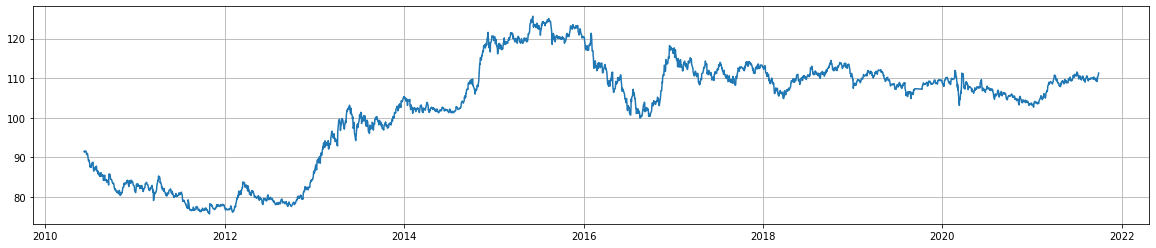

In [3]:
jpy_usd = pd.read_csv('../temp_data/jpy_usd.csv')
jpy_usd.index = pd.to_datetime(jpy_usd['Date'])
del jpy_usd['Date']
jpy_usd = jpy_usd[:end]
plt.figure(figsize=(20,4))
plt.plot(jpy_usd['Close'])
plt.grid()
plt.show()

In [4]:
term_df = jpy_usd[start:end]

In [5]:
import warnings
warnings.simplefilter('ignore')

pos_trans = []
flag = 0
hit_count = 0
trade_count = 0

for i in tqdm(range(len(term_df))):
    current_day = str(term_df.index[i])[:10]
    if flag == 'after_sell':
        posses['JPY'] += (posses['USD']*0.5*jpy_usd.loc[current_day,'Close'])
        posses['USD'] = posses['USD']*0.5
        #実際昨日より値が上がったらあたり
        if jpy_usd.loc[:current_day,'Close'][-2] < jpy_usd.loc[:current_day,'Close'][-1]:
            hit_count += 1
        trade_count += 1
            
    elif flag == 'after_buy':
        posses['USD'] += (posses['JPY']*0.5/jpy_usd.loc[current_day,'Close'])
        posses['JPY'] = posses['JPY']*0.5
        #実際昨日より値が下がったらあたり
        if jpy_usd.loc[:current_day,'Close'][-2] > jpy_usd.loc[:current_day,'Close'][-1]:
            hit_count += 1
        trade_count += 1
    
    try:
        print(hit_count,trade_count,hit_count/trade_count*100)
    except:
        pass
#     print(current_day,posses,flag)
    posses,flag = trade(current_day=str(term_df.index[i])[:10],posses=posses,df=jpy_usd)
#     print(posses,flag)
    rec = posses.copy()
    rec['current_day'] = str(term_df.index[i])[:10]
    pos_trans.append(rec)
    
pos_trans = pd.DataFrame(pos_trans)

  0%|          | 0/42 [00:00<?, ?it/s]

accuracy: 0.6666666666666666
accuracy: 0.75
1 1 100.0
accuracy: 0.7222222222222222
1 2 50.0
accuracy: 0.6851851851851852
1 2 50.0
accuracy: 0.7314814814814815
2 3 66.66666666666666
accuracy: 0.7407407407407407
3 4 75.0
accuracy: 0.7314814814814815
3 5 60.0
accuracy: 0.7407407407407407
3 6 50.0
accuracy: 0.7314814814814815
4 7 57.14285714285714
accuracy: 0.7037037037037037
5 8 62.5
accuracy: 0.7222222222222222
6 9 66.66666666666666
accuracy: 0.7037037037037037
6 10 60.0
accuracy: 0.6759259259259259
6 10 60.0
accuracy: 0.7407407407407407
6 11 54.54545454545454
accuracy: 0.7037037037037037
7 12 58.333333333333336
accuracy: 0.6851851851851852
7 12 58.333333333333336
accuracy: 0.7222222222222222
8 13 61.53846153846154
accuracy: 0.6944444444444444
8 13 61.53846153846154
accuracy: 0.7037037037037037
9 14 64.28571428571429
accuracy: 0.6851851851851852
9 14 64.28571428571429
accuracy: 0.7222222222222222
10 15 66.66666666666666
accuracy: 0.6851851851851852
10 15 66.66666666666666
accuracy: 0.712

In [6]:
hit_count

14

In [7]:
trade_count

21

In [8]:
pos_trans.index = pd.to_datetime(pos_trans['current_day'])
del pos_trans['current_day']

In [9]:
df = pd.concat([pos_trans,jpy_usd],axis=1)

In [10]:
df['JPY_POS'] = df['USD']*df['Close']+df['JPY']

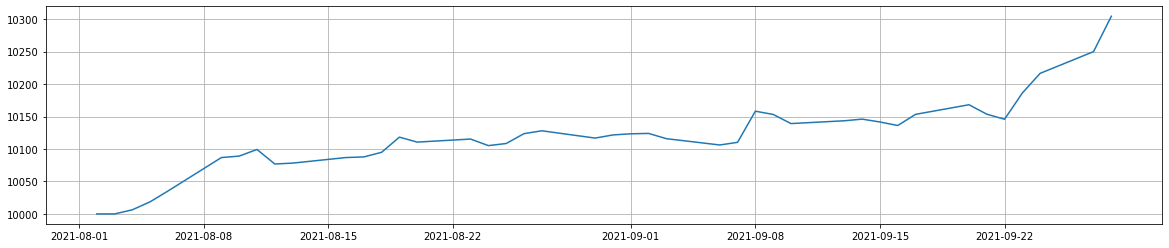

In [11]:
plt.figure(figsize=(20,4))
plt.plot(df['JPY_POS'])
plt.grid()
plt.show()

In [12]:
df = df.dropna()

In [13]:
df['base_pos'] = df['Close']/df.iloc[0,5]*10000

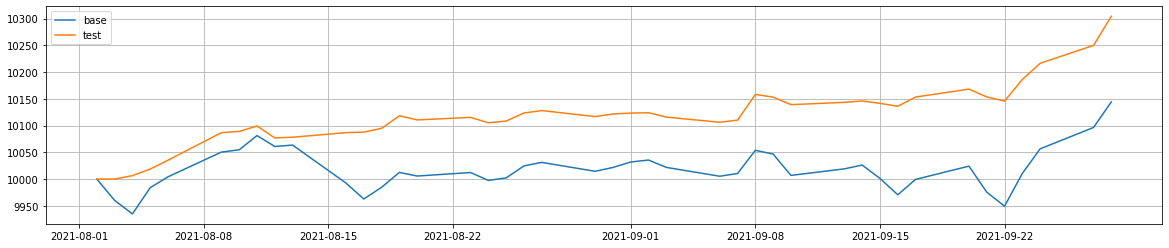

In [14]:
plt.figure(figsize=(20,4))
plt.plot(df['base_pos'])
plt.plot(df['JPY_POS'])
plt.legend(['base','test'])
plt.grid()
plt.show()

In [15]:
df['JPY_POS'].std()/10000

0.0059159839423072735

In [16]:
(df['JPY_POS'].mean()-10000)/10000

0.011863817899650348

In [17]:
risk = df['JPY_POS'].std()/10000

In [18]:
ret = (df['JPY_POS'].mean()-10000)/10000

In [19]:
ret/risk

2.00538372236071

In [22]:
jpy_usd

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-07,91.570000,92.064003,90.989998,91.515999,91.515999,0
2010-06-08,91.489998,91.906998,90.885002,91.410004,91.410004,0
2010-06-09,91.410004,91.654999,91.040001,91.364998,91.364998,0
2010-06-10,91.320999,91.441002,90.855003,91.308998,91.308998,0
2010-06-11,91.331001,91.755997,91.262001,91.620003,91.620003,0
...,...,...,...,...,...,...
2021-09-22,109.153999,109.639999,109.129997,109.149002,109.149002,0
2021-09-23,109.808998,110.195000,109.792000,109.821999,109.821999,0
2021-09-24,110.322998,110.738998,110.310997,110.325996,110.325996,0


In [21]:
_,flag = trade(current_day=current_day,posses=posses,df=jpy_usd)

accuracy: 0.7037037037037037


({'JPY': 1510.5812669713766, 'USD': 79.08172065383255}, 'after_sell')